In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import scipy.stats as sps 
%matplotlib inline

In [2]:
#KS=pd.read_csv("KS_FDR_AllVariables.csv")

In [31]:
data= pd.read_csv("all_variables.csv")

In [4]:
#data.head()

In [5]:
#KS.tail(20)

In [6]:
#KS.reset_index(drop=True)

In [7]:
#nvars=len(KS)
#num_keep=round(nvars/5*2)
#num_keep

In [8]:
#KS['field']

In [9]:
#cols_keep=list(KS['field'][1:num_keep])
#type(cols_keep)

In [10]:
#cols_keep

In [11]:
#cols_keep.insert(0,'Fraud')
#cols_keep.insert(0,'Recnum')
#cols_keep

In [12]:
#vars_keep=data.filter(cols_keep, axis=1)
#vars_keep.shape

In [13]:
#vars_keep.head()

## Drop first two weeks of data

In [14]:
vars_keep = pd.read_csv("halfdata.csv")

In [15]:
vars_keep.head()

,Unnamed: 0,Recnum,Amount,Fraud,mean_Cardnum_1d,mean_Cardnum_3d,mean_Cardnum_7d,mean_Cardnum_14d,mean_Cardnum_30d,Actual/mean_Cardnum_30d,...,Actual/sum_Cardnum_Merch state_3d,sum_Cardnum_Merch state_7d,sum_Cardnum_Merch state_14d,sum_Cardnum_Merch state_30d,Actual/count_Cardnum_Merch state_1d,count_Cardnum_Merch state_3d,Actual/count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state
0,813,818,48.97,0,48.97,48.970000,48.97,48.97,48.97,1.000000,...,1.000000,48.97,48.97,48.97,48.97,1.0,48.97,1.0,365.0,365.0
1,1398,1403,460.00,0,460.00,221.656667,186.24,186.24,186.24,2.469931,...,1.000000,460.00,460.00,460.00,460.00,1.0,460.00,1.0,1.0,365.0
2,1217,1222,87.02,0,87.02,99.510000,99.51,99.51,99.51,0.874485,...,0.437242,199.02,199.02,199.02,87.02,2.0,43.51,2.0,1.0,1.0
3,2163,2169,110.00,0,181.21,181.210000,136.76,136.76,136.76,0.804329,...,1.000000,110.00,110.00,110.00,110.00,1.0,110.00,1.0,4.0,365.0
4,2084,2090,25.00,0,25.00,25.000000,72.00,72.00,72.00,0.347222,...,1.000000,25.00,25.00,25.00,25.00,1.0,25.00,1.0,4.0,365.0


In [16]:
vdata=vars_keep[vars_keep['Recnum']>=3345]

In [17]:
Y=vdata['Fraud']
vdata=vdata.drop(columns=['Recnum','Fraud','Unnamed: 0'])

In [18]:
vdata.shape

(80632, 135)

## Feature Selection

In [19]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [20]:
%%time
model= LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=3, verbose=2, n_jobs=-1, scoring='roc_auc')
rfecv.fit(vdata,Y)

Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
F

In [21]:
print('Optimal number of feature:', rfecv.n_features_)

Optimal number of feature: 16


In [22]:
var_selected=pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), vdata.columns)),
                         columns=['ranking','variable'])
pd.options.display.max_rows = 150
print(var_selected)

     ranking                             variable
0          1              Actual/mean_Cardnum_30d
1          1             Actual/mean_Merchnum_14d
2          1             Actual/mean_Merchnum_30d
3          1              Actual/mean_Merchnum_7d
4          1            Actual/median_Merchnum_7d
5          1      Actual/sum_Cardnum_Merch zip_3d
6          1       Actual/sum_Cardnum_Merchnum_3d
7          1               Days_since_per_Cardnum
8          1   Days_since_per_Cardnum_Merch state
9          1                     count_Cardnum_1d
10         1                     count_Cardnum_7d
11         1         count_Cardnum_Merch state_3d
12         1         count_Cardnum_Merch state_7d
13         1           count_Cardnum_Merch zip_3d
14         1            count_Cardnum_Merchnum_3d
15         1            count_Cardnum_Merchnum_7d
16         2                      mean_Cardnum_1d
17         3              Actual/count_Cardnum_1d
18         4             Actual/count_Cardnum_30d


In [23]:
rfecv.ranking_

array([ 98,   2,  25,  84,  54,   5,   1,   8,  53,  87,  97, 102,  62,
        26, 105,  55,  65,  67,  95, 119,  48,  51,   1,   3,  14,   1,
        83,   4,  40, 109,  23,   1,  88,   1,  11,   1,  69,  71, 111,
        72,  73, 114, 106,  96,   1,  18,  38, 100,   6, 107,  82,  41,
        45,  76,  33,  92,  63, 120,  79,  86,  32,  58,  10,  43,  57,
        27, 110,   9,  28,  99,  70,  29,   1,  44, 104,  60,  24,   1,
        68,   1,  81,  91,  15,  78,  47,  22,  21, 112,  19, 108,  59,
       101,  42,  46,  89, 103,  61,  85, 115,  75,   1, 113,  37,  90,
         7,   1,  80,  36, 117,  30,  35,  64,  17,  20,  31,  52,  12,
        13,  56,  39,  34, 118,  66,  93,  94,  77, 116,  49,  50,  74,
         1,  16,   1,   1,   1])

In [24]:
rfecv.grid_scores_

array([0.70607233, 0.6735598 , 0.69295744, 0.70682058, 0.6905106 ,
       0.70390389, 0.71216909, 0.70319505, 0.69406517, 0.69443387,
       0.70509096, 0.70856383, 0.71382919, 0.65528976, 0.66563838,
       0.75521886, 0.70504613, 0.68760877, 0.67526173, 0.70593152,
       0.69355734, 0.6812495 , 0.69595431, 0.68677485, 0.58221097,
       0.54592905, 0.51015982, 0.52923705, 0.52759719, 0.56184822,
       0.55725514, 0.54497485, 0.56104027, 0.562947  , 0.55924898,
       0.56876631, 0.57982151, 0.59664249, 0.58004234, 0.64979874,
       0.62997382, 0.62869597, 0.65585907, 0.68330708, 0.68857878,
       0.67837477, 0.67652994, 0.69105382, 0.67718545, 0.66002849,
       0.68564568, 0.67889996, 0.67139149, 0.67214118, 0.67853435,
       0.68337963, 0.69013249, 0.70160901, 0.69868708, 0.69441242,
       0.69599364, 0.70216028, 0.70239486, 0.7003215 , 0.6993548 ,
       0.70171584, 0.71060868, 0.70592418, 0.7034289 , 0.7052956 ,
       0.70253211, 0.702625  , 0.70507988, 0.70500962, 0.70459

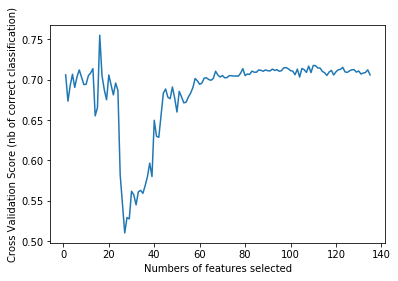

In [25]:
plt.figure()
plt.xlabel("Numbers of features selected")
plt.ylabel("Cross Validation Score (nb of correct classification)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)

In [26]:
#var_selected.drop([69])

In [27]:
var_selected.reset_index(drop=True)
var_selected

,ranking,variable
0,1,Actual/mean_Cardnum_30d
1,1,Actual/mean_Merchnum_14d
2,1,Actual/mean_Merchnum_30d
3,1,Actual/mean_Merchnum_7d
4,1,Actual/median_Merchnum_7d
5,1,Actual/sum_Cardnum_Merch zip_3d
6,1,Actual/sum_Cardnum_Merchnum_3d
7,1,Days_since_per_Cardnum
8,1,Days_since_per_Cardnum_Merch state
9,1,count_Cardnum_1d


In [28]:
#num_keep2=

In [35]:
cols_keep=list(var_selected['variable'])[0:20]
cols_keep

['Actual/mean_Cardnum_30d',
 'Actual/mean_Merchnum_14d',
 'Actual/mean_Merchnum_30d',
 'Actual/mean_Merchnum_7d',
 'Actual/median_Merchnum_7d',
 'Actual/sum_Cardnum_Merch zip_3d',
 'Actual/sum_Cardnum_Merchnum_3d',
 'Days_since_per_Cardnum',
 'Days_since_per_Cardnum_Merch state',
 'count_Cardnum_1d',
 'count_Cardnum_7d',
 'count_Cardnum_Merch state_3d',
 'count_Cardnum_Merch state_7d',
 'count_Cardnum_Merch zip_3d',
 'count_Cardnum_Merchnum_3d',
 'count_Cardnum_Merchnum_7d',
 'mean_Cardnum_1d',
 'Actual/count_Cardnum_1d',
 'Actual/count_Cardnum_30d',
 'mean_Cardnum_30d']

In [36]:
cols_keep.insert(0,'Fraud')
cols_keep.insert(0,'Recnum')
finaldata=data.filter(cols_keep, axis=1)

In [37]:
finaldata.shape

(96397, 22)

In [38]:
finaldata.head(10)

,Recnum,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
0,818,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,365.0,...,1.0,1.0,1.0,1.0,1.0,1.0,48.970,48.970,48.970000,48.970000
1,1403,0,2.469931,1.807572,1.807572,1.807572,1.807572,1.0,1.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,460.000,460.000,115.000000,186.240000
2,1222,0,0.874485,0.438027,0.438027,0.438027,1.000000,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,1.0,87.020,87.020,43.510000,99.510000
3,2169,0,0.804329,0.623238,0.623238,0.623238,1.116638,1.0,1.0,4.0,...,4.0,1.0,1.0,1.0,1.0,1.0,181.210,55.000,27.500000,136.760000
4,2090,0,0.347222,0.171001,0.171001,0.171001,0.287290,1.0,1.0,4.0,...,2.0,1.0,1.0,1.0,1.0,1.0,25.000,25.000,12.500000,72.000000
5,3085,0,2.650924,2.586764,2.586764,2.412183,5.036273,1.0,1.0,3.0,...,4.0,1.0,1.0,1.0,1.0,1.0,329.095,276.995,92.331667,208.980000
6,5874,0,0.442006,0.331330,0.551979,1.000000,1.000000,1.0,1.0,1.0,...,3.0,1.0,1.0,1.0,1.0,1.0,110.000,110.000,10.000000,248.865455
7,8373,0,0.512210,1.405405,1.227585,1.000000,1.000000,1.0,1.0,4.0,...,4.0,1.0,1.0,1.0,1.0,1.0,260.000,260.000,15.294118,507.604706
8,15056,0,0.536644,1.000000,0.856640,1.000000,1.000000,1.0,1.0,1.0,...,3.0,1.0,1.0,1.0,1.0,1.0,194.800,194.800,7.492308,362.996923
9,16431,0,2.239980,1.376440,1.457957,1.376440,1.376440,1.0,1.0,2.0,...,5.0,1.0,1.0,1.0,1.0,1.0,430.000,430.000,43.000000,191.966000


In [39]:
finaldata.to_csv('vars_final.csv',index=False)

## Z scale 20 variables we selected

In [40]:
cols = list(finaldata.columns)
cols.remove('Recnum')
cols.remove('Fraud')
cols

['Actual/mean_Cardnum_30d',
 'Actual/mean_Merchnum_14d',
 'Actual/mean_Merchnum_30d',
 'Actual/mean_Merchnum_7d',
 'Actual/median_Merchnum_7d',
 'Actual/sum_Cardnum_Merch zip_3d',
 'Actual/sum_Cardnum_Merchnum_3d',
 'Days_since_per_Cardnum',
 'Days_since_per_Cardnum_Merch state',
 'count_Cardnum_1d',
 'count_Cardnum_7d',
 'count_Cardnum_Merch state_3d',
 'count_Cardnum_Merch state_7d',
 'count_Cardnum_Merch zip_3d',
 'count_Cardnum_Merchnum_3d',
 'count_Cardnum_Merchnum_7d',
 'mean_Cardnum_1d',
 'Actual/count_Cardnum_1d',
 'Actual/count_Cardnum_30d',
 'mean_Cardnum_30d']

In [60]:
zsvar=finaldata.copy()

In [61]:
from scipy.stats import zscore

In [62]:
## z scale 20 variables we selected
for col in cols:
    zsvar[col]=zscore(zsvar[col],axis=None)

In [63]:
zsvar.head()

,Recnum,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
0,818,0,-0.003287,0.001750,0.001823,-0.000786,-0.031299,0.529859,0.505899,7.346025,...,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.474089,-0.414382,-0.077371,-0.721970
1,1403,0,0.915446,0.338513,0.263935,0.374613,-0.013802,0.529859,0.505899,-0.202011,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,0.091413,0.229728,0.219330,-0.437000
2,1222,0,-0.081736,-0.232596,-0.180575,-0.262019,-0.031299,0.529859,0.505899,-0.202011,...,-0.305396,-0.107245,-0.148293,-0.207194,-0.204367,-0.185907,-0.421739,-0.354755,-0.101906,-0.617050
3,2169,0,-0.125585,-0.155362,-0.120462,-0.175923,-0.028772,0.529859,0.505899,-0.139801,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.292151,-0.404932,-0.173845,-0.539719
4,2090,0,-0.411285,-0.343948,-0.267243,-0.386146,-0.046741,0.529859,0.505899,-0.139801,...,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.507067,-0.451944,-0.241247,-0.674160


In [64]:
zsvar.describe()

,Recnum,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
count,96397.000000,96397.000000,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,...,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04
mean,48365.481820,0.010986,-2.174302e-15,1.419363e-16,1.013232e-17,-1.895808e-15,-8.602605e-15,9.276087e-14,-6.192323e-14,-8.692469e-15,...,-2.579563e-14,2.892155e-14,2.812323e-14,-7.931865e-15,-4.911541e-14,-7.715408e-14,-6.896300e-16,-9.617837e-17,8.755487e-17,-1.511943e-16
std,27945.003883,0.104236,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,1.000000,0.000000,-6.282733e-01,-4.152054e-01,-3.227263e-01,-4.655776e-01,-5.296253e-02,-2.563899e+00,-2.672400e+00,-2.227469e-01,...,-3.689170e-01,-2.275086e-01,-2.128988e-01,-2.071940e-01,-2.043670e-01,-1.859066e-01,-5.414484e-01,-4.911157e-01,-2.974125e-01,-8.232775e-01
25%,24154.000000,0.000000,-5.060629e-01,-2.658500e-01,-2.233485e-01,-2.598241e-01,-3.164122e-02,5.298591e-01,5.058991e-01,-2.227469e-01,...,-3.053965e-01,-2.275086e-01,-2.128988e-01,-2.071940e-01,-2.043670e-01,-1.859066e-01,-4.825292e-01,-4.550785e-01,-2.849282e-01,-5.145999e-01
50%,48365.000000,0.000000,-2.475479e-01,1.750018e-03,-8.265780e-03,-7.859926e-04,-3.129912e-02,5.298591e-01,5.058991e-01,-2.020105e-01,...,-1.783553e-01,-2.275086e-01,-2.128988e-01,-2.071940e-01,-2.043670e-01,-1.859066e-01,-3.213318e-01,-3.341796e-01,-2.368957e-01,-1.941543e-01
75%,72578.000000,0.000000,1.644324e-01,1.750018e-03,1.822963e-03,-7.859926e-04,-3.053165e-02,5.298591e-01,5.058991e-01,-1.190651e-01,...,1.220634e-02,-1.072450e-01,-8.368641e-02,-2.071940e-01,-2.043670e-01,-1.186688e-01,8.302011e-02,3.635258e-02,-6.714884e-02,2.080842e-01
max,96753.000000,1.000000,8.561597e+01,1.664204e+02,2.322247e+02,1.139894e+02,2.827311e+02,5.298591e-01,5.058991e-01,7.346025e+00,...,2.199032e+01,2.093888e+01,2.252849e+01,2.096109e+01,2.168728e+01,2.274221e+01,3.852182e+01,4.400226e+01,1.073203e+02,5.211389e+01


In [65]:
zsvar.head()

,Recnum,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
0,818,0,-0.003287,0.001750,0.001823,-0.000786,-0.031299,0.529859,0.505899,7.346025,...,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.474089,-0.414382,-0.077371,-0.721970
1,1403,0,0.915446,0.338513,0.263935,0.374613,-0.013802,0.529859,0.505899,-0.202011,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,0.091413,0.229728,0.219330,-0.437000
2,1222,0,-0.081736,-0.232596,-0.180575,-0.262019,-0.031299,0.529859,0.505899,-0.202011,...,-0.305396,-0.107245,-0.148293,-0.207194,-0.204367,-0.185907,-0.421739,-0.354755,-0.101906,-0.617050
3,2169,0,-0.125585,-0.155362,-0.120462,-0.175923,-0.028772,0.529859,0.505899,-0.139801,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.292151,-0.404932,-0.173845,-0.539719
4,2090,0,-0.411285,-0.343948,-0.267243,-0.386146,-0.046741,0.529859,0.505899,-0.139801,...,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.507067,-0.451944,-0.241247,-0.674160


In [66]:
zsvar1 = zsvar[zsvar['Recnum'] <= 84299]

In [68]:
zsvar1.shape

(83970, 22)

In [50]:
zsvar.to_csv('0325_vars_final_zscale.csv',index=False)

In [69]:
zsvar2 = zsvar[zsvar['Recnum'] > 84299]

In [70]:
zsvar2.shape

(12427, 22)

In [71]:
zsvar2.to_csv('0325_oot_final_zscale.csv',index=False)